# Machine Learning Intern at Infopillar Solutions for November 2021 Batch

# Author : Anand Bhausaheb Kharabe

# Task 2 :Fake News Detection Project

Project idea – Fake news spreads like a wildfire and this is a big issue in this era. You can learn how to distinguish fake news from a real one. You can use supervised learning to implement a model like this.

Dataset: https://bit.ly/3FxCSC4

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
t2 = pd.read_csv('news.csv')
t2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# EDA on the dataset variable t2

In [3]:
t2.shape # Shows the shape of the data in tuple format

(6335, 4)

In [4]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
t2.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
t2.isnull().sum() # shows the summary of the dataframe

title    0
text     0
label    0
dtype: int64

In [7]:
t2.duplicated().sum()

29

In [8]:
t2.drop_duplicates(keep='first', inplace=True)  # Droping the duplicates

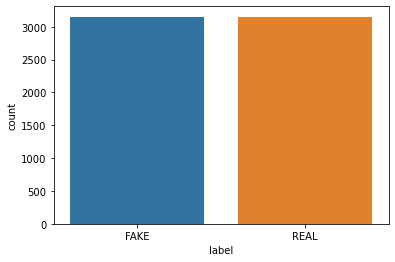

In [9]:
sns.countplot(data=t2, x='label')
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

ps = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

In [11]:
def tranform_text(text):
    text = text.lower()     # Converting to lower case

    word_arr = nltk.word_tokenize(text)                                                     
    correct = []

    for word in word_arr:
        if (word.isalnum()) and (word not in STOPWORDS) and (word not in punctuation):      
            correct.append(ps.stem(word))                                                   

    return " ".join(correct)

In [12]:
t2['title'] = t2['title'].apply(tranform_text)
t2['text'] = t2['text'].apply(tranform_text)
t2.head()

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE
2,kerri go pari gestur sympathi,secretari state john kerri said monday stop pa...,REAL
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb 9 2016 lesson tonigh...,FAKE
4,battl new york primari matter,primari day new york hillari clinton donald tr...,REAL


# Using TF-IDF for Vectorizing

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(max_features=3000)
tfidf_text = TfidfVectorizer(max_features=20000)

In [14]:
title = tfidf_title.fit_transform(t2['title']).toarray()
text = tfidf_text.fit_transform(t2['text']).toarray()

In [15]:
print("Shape of Transformed Title :-> ",title.shape) 
print("Shape of Transformed Text :-> ",text.shape)

Shape of Transformed Title :->  (6306, 3000)
Shape of Transformed Text :->  (6306, 20000)


In [16]:
df_title = pd.DataFrame(title)
df_text = pd.DataFrame(text)

In [17]:
t = pd.concat([df_title, df_text], axis=1)
t.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(t2['label'])

# Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t, target, test_size=0.2, random_state=10)

In [21]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
1163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4875,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.466675,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3441,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4623,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [24]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
compare

,Actual Values,Predicted Values
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1257,1,1
1258,0,0
1259,0,0
1260,0,0


In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8977812995245642

In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[565  53]
 [ 76 568]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       618
           1       0.91      0.88      0.90       644

    accuracy                           0.90      1262
   macro avg       0.90      0.90      0.90      1262
weighted avg       0.90      0.90      0.90      1262

